In [165]:
import numpy
import pandas

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [107]:
dataframe = pandas.read_csv("forestfires.csv")



# Encode Data
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)


In [108]:
print("Head:",dataframe.head())

Head:    month  day  FFMC   DMC     DC  ISI  temp  ...  monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  size_category
0      3    5  86.2  26.2   94.3  5.1   8.2  ...         0         1         0         0         0         0          small
1     10    2  90.6  35.4  669.1  6.7  18.0  ...         0         0         0         0         1         0          small
2     10    6  90.6  43.7  686.9  6.7  14.6  ...         0         0         0         0         1         0          small
3      3    5  91.7  33.3   77.5  9.0   8.3  ...         0         1         0         0         0         0          small
4      3    7  89.3  51.3  102.2  9.6  11.4  ...         0         1         0         0         0         0          small

[5 rows x 31 columns]


In [109]:
print("Statistical Description:", dataframe.describe())


Statistical Description:             month         day        FFMC         DMC  ...    monthmay    monthnov    monthoct    monthsep
count  517.000000  517.000000  517.000000  517.000000  ...  517.000000  517.000000  517.000000  517.000000
mean     7.475822    4.259188   90.644681  110.872340  ...    0.003868    0.001934    0.029014    0.332689
std      2.275990    2.072929    5.520111   64.046482  ...    0.062137    0.043980    0.168007    0.471632
min      1.000000    1.000000   18.700000    1.100000  ...    0.000000    0.000000    0.000000    0.000000
25%      7.000000    2.000000   90.200000   68.600000  ...    0.000000    0.000000    0.000000    0.000000
50%      8.000000    5.000000   91.600000  108.300000  ...    0.000000    0.000000    0.000000    0.000000
75%      9.000000    6.000000   92.900000  142.400000  ...    0.000000    0.000000    0.000000    1.000000
max     12.000000    7.000000   96.200000  291.300000  ...    1.000000    1.000000    1.000000    1.000000

[8 rows x 3

In [110]:
print("Shape:", dataframe.shape)


Shape: (517, 31)


In [111]:
print("Data Types:", dataframe.dtypes)

Data Types: month              int64
day                int64
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object


In [112]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:              month       day      FFMC       DMC        DC  ...  monthmar  monthmay  monthnov  monthoct  monthsep
month     1.000000 -0.050837  0.291477  0.466645  0.868698  ... -0.672248 -0.067855  0.068231  0.191895  0.473304
day      -0.050837  1.000000 -0.041068  0.062870  0.000105  ... -0.036634  0.037338 -0.048025 -0.032764 -0.022955
FFMC      0.291477 -0.041068  1.000000  0.382619  0.330512  ... -0.074327 -0.037230 -0.088964 -0.005998  0.076609
DMC       0.466645  0.062870  0.382619  1.000000  0.682192  ... -0.407404 -0.081980 -0.074218 -0.187632  0.110907
DC        0.868698  0.000105  0.330512  0.682192  1.000000  ... -0.650427 -0.114209 -0.078380  0.093279  0.531857
ISI       0.186597  0.032909  0.531805  0.305128  0.229154  ... -0.143520 -0.060493 -0.076559 -0.071154 -0.068877
temp      0.368842  0.052190  0.431532  0.469594  0.496208  ... -0.341797 -0.045540 -0.053798 -0.053513  0.088006
RH       -0.095280  0.092151 -0.300995  0.073795 -0.039192  ... -0.089836  

'temp' has the highest correlation with the area of forest fire(which is a positive correlation), followed by 'RH' also a positive correlation, 'Rain' has the least correlation

In [168]:
label_encoder = preprocessing.LabelEncoder()
dataframe['size_category']= label_encoder.fit_transform(dataframe['size_category'])

In [207]:
dataset = dataframe.values


X = dataset[:,0:12]
Y = dataset[:,12]

In [114]:
#Feature Selection
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

Number of Features:  3
Selected Features:  [False  True False False False False False False False False  True  True]
Feature Ranking:  [10  1  9  8  7  6  5  4  3  2  1  1]


C:\Users\shrih\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shrih\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shrih\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shrih\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shrih\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

'Wind', 'RH' and 'DMC' were top 3 selected features/feature combination for predicting 'Area' using Recursive Feature Elimination, the 2nd selected feature was atually one of the attributes with the highest correlation with the 'Area'

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

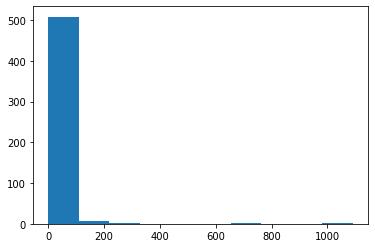

In [115]:
plt.hist((dataframe.area))


array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>,
        <AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>],
       [<AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>,
        <AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>],
       [<AxesSubplot:title={'center':'mo

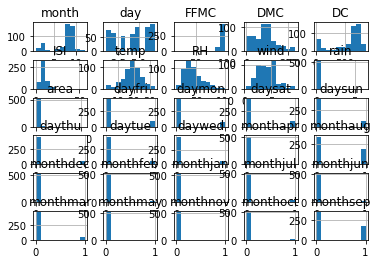

In [116]:
dataframe.hist()

Temp' has a near Guassian Distribution. There are a mixture of positive skews and negative skews among the other attributes

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='

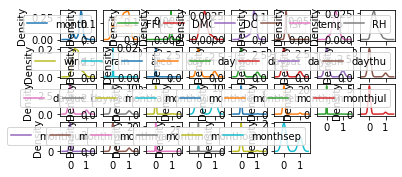

In [117]:
dataframe.plot(kind='density', subplots=True, layout=(6,8), sharex=False, sharey=False)

month          AxesSubplot(0.125,0.772143;0.110714x0.107857)
day         AxesSubplot(0.257857,0.772143;0.110714x0.107857)
FFMC        AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DMC         AxesSubplot(0.523571,0.772143;0.110714x0.107857)
DC          AxesSubplot(0.656429,0.772143;0.110714x0.107857)
ISI         AxesSubplot(0.789286,0.772143;0.110714x0.107857)
temp           AxesSubplot(0.125,0.642714;0.110714x0.107857)
RH          AxesSubplot(0.257857,0.642714;0.110714x0.107857)
wind        AxesSubplot(0.390714,0.642714;0.110714x0.107857)
rain        AxesSubplot(0.523571,0.642714;0.110714x0.107857)
area        AxesSubplot(0.656429,0.642714;0.110714x0.107857)
dayfri      AxesSubplot(0.789286,0.642714;0.110714x0.107857)
daymon         AxesSubplot(0.125,0.513286;0.110714x0.107857)
daysat      AxesSubplot(0.257857,0.513286;0.110714x0.107857)
daysun      AxesSubplot(0.390714,0.513286;0.110714x0.107857)
daythu      AxesSubplot(0.523571,0.513286;0.110714x0.107857)
daytue      AxesSubplot(

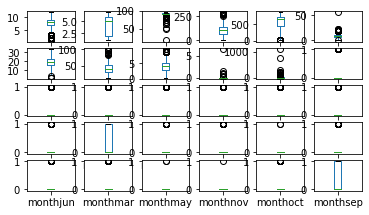

In [118]:
dataframe.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)

array([[<AxesSubplot:xlabel='month', ylabel='month'>,
        <AxesSubplot:xlabel='day', ylabel='month'>,
        <AxesSubplot:xlabel='FFMC', ylabel='month'>,
        <AxesSubplot:xlabel='DMC', ylabel='month'>,
        <AxesSubplot:xlabel='DC', ylabel='month'>,
        <AxesSubplot:xlabel='ISI', ylabel='month'>,
        <AxesSubplot:xlabel='temp', ylabel='month'>,
        <AxesSubplot:xlabel='RH', ylabel='month'>,
        <AxesSubplot:xlabel='wind', ylabel='month'>,
        <AxesSubplot:xlabel='rain', ylabel='month'>,
        <AxesSubplot:xlabel='area', ylabel='month'>,
        <AxesSubplot:xlabel='dayfri', ylabel='month'>,
        <AxesSubplot:xlabel='daymon', ylabel='month'>,
        <AxesSubplot:xlabel='daysat', ylabel='month'>,
        <AxesSubplot:xlabel='daysun', ylabel='month'>,
        <AxesSubplot:xlabel='daythu', ylabel='month'>,
        <AxesSubplot:xlabel='daytue', ylabel='month'>,
        <AxesSubplot:xlabel='daywed', ylabel='month'>,
        <AxesSubplot:xlabel='monthapr'

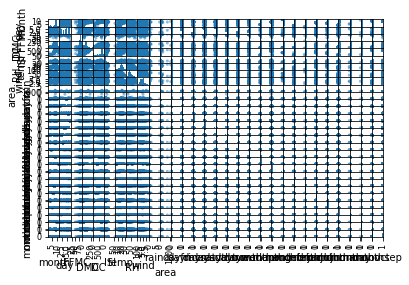

In [119]:
scatter_matrix(dataframe)

[Text(0, 0, 'month'),
 Text(0, 1, 'day'),
 Text(0, 2, 'FFMC'),
 Text(0, 3, 'DMC'),
 Text(0, 4, 'DC'),
 Text(0, 5, 'ISI'),
 Text(0, 6, 'temp'),
 Text(0, 7, 'RH'),
 Text(0, 8, 'wind'),
 Text(0, 9, 'rain'),
 Text(0, 10, 'area'),
 Text(0, 11, 'dayfri'),
 Text(0, 12, 'daymon'),
 Text(0, 13, 'daysat'),
 Text(0, 14, 'daysun'),
 Text(0, 15, 'daythu'),
 Text(0, 16, 'daytue'),
 Text(0, 17, 'daywed'),
 Text(0, 18, 'monthapr'),
 Text(0, 19, 'monthaug'),
 Text(0, 20, 'monthdec'),
 Text(0, 21, 'monthfeb'),
 Text(0, 22, 'monthjan'),
 Text(0, 23, 'monthjul'),
 Text(0, 24, 'monthjun'),
 Text(0, 25, 'monthmar'),
 Text(0, 26, 'monthmay'),
 Text(0, 27, 'monthnov'),
 Text(0, 28, 'monthoct'),
 Text(0, 29, 'monthsep'),
 Text(0, 30, 'size_category')]

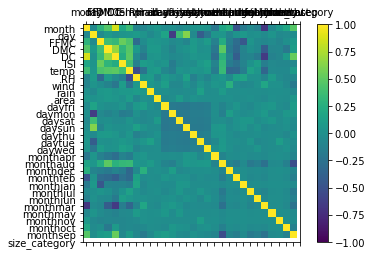

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

In [122]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.447533 (0.201420)
Ridge: 0.447531 (0.201400)
Lasso: 0.009655 (0.243617)
ElasticNet: 0.011149 (0.243027)
Bag_Re: 1.000000 (0.000000)
RandomForest: 1.000000 (0.000000)
ExtraTreesRegressor: 1.000000 (0.000000)
KNN: 0.389358 (0.148549)
CART: 1.000000 (0.000000)
SVM: 0.960012 (0.099985)


C:\Users\shrih\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shrih\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shrih\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'ExtraTreesRegressor' and 'DecisionTreeRegressor' are the best estimators/models for this dataset, followed by 'BaggingRegressor', ey can be further explored and their hyperparameters tuned

In [192]:
y = numpy.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)

In [124]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=12, kernel_initializer='uniform', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(5, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model




In [143]:

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=600, batch_size=5, verbose=0)

kfold = KFold(n_splits=30, random_state=seed)


In [200]:
import tensorflow as tf
tf_y = tf.convert_to_tensor(Y,dtype= tf.float32)
tf_X = tf.convert_to_tensor(X,dtype= tf.float32)

In [208]:

results = cross_val_score(estimator, X, Y, cv=kfold)

print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -0.14 (0.15) MSE
